# Happiness and GDP data: Clustering and predicting GDP by clusters

# Imports 

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import datasets, preprocessing, metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import preprocessing as prep
import pickle


from bi_functions_tobias import *

# Loading data frame from file

In [5]:
file_name = 'dataframes.h5'
key = "happiness_df"

df = pd.read_hdf(file_name, key)

# 1) Exploration of data

### 1.1) Getting an overview

In [8]:
dk = df[df["Country"]=="Denmark"]
dk.head()

,Country,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
506,Denmark,2007,7.834233,10.888726,0.954201,68.739998,0.932086,0.235808,0.206006,0.777936,0.194324
507,Denmark,2008,7.970892,10.877718,0.953912,68.959999,0.969788,0.267880,0.247505,0.759462,0.163091
508,Denmark,2009,7.683359,10.822057,0.938892,69.180000,0.949336,0.259391,0.205770,0.781799,0.233585
509,Denmark,2010,7.770515,10.836152,0.974977,69.400002,0.943631,0.238271,0.174896,0.796209,0.154563
510,Denmark,2011,7.788232,10.845314,0.961736,69.620003,0.934760,0.293352,0.220043,0.777892,0.174883


In [9]:
df.head()

,Country,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1958 entries, 0 to 2198
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           1958 non-null   object 
 1   Year                              1958 non-null   int64  
 2   Life Ladder                       1958 non-null   float64
 3   Log GDP per capita                1958 non-null   float64
 4   Social support                    1958 non-null   float64
 5   Healthy life expectancy at birth  1958 non-null   float64
 6   Freedom to make life choices      1958 non-null   float64
 7   Generosity                        1958 non-null   float64
 8   Perceptions of corruption         1958 non-null   float64
 9   Positive affect                   1958 non-null   float64
 10  Negative affect                   1958 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 183.6+ KB


In [11]:
df.describe()

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000
mean,2014.308478,5.458662,9.344040,0.808119,63.156228,0.745463,0.000220,0.747932,0.653605,0.273310
std,4.640344,1.141023,1.157988,0.123489,7.068698,0.140515,0.161681,0.185061,0.107496,0.085310
min,2005.000000,2.178809,5.526723,0.290184,6.720000,0.257534,-0.337527,0.035198,0.178886,0.094316
25%,2011.000000,4.608727,8.442262,0.739302,58.581250,0.652924,-0.108828,0.692507,0.570857,0.209589
50%,2014.000000,5.390818,9.493933,0.834138,65.000000,0.767043,-0.022555,0.802283,0.664715,0.262562
75%,2018.000000,6.274685,10.303009,0.906110,68.571247,0.856980,0.090562,0.869898,0.740727,0.324729
max,2022.000000,7.970892,11.663788,0.987343,74.474998,0.985178,0.702708,0.983276,0.883586,0.704590


##### Checking the number of countries in data set to see if it even make sense to cluster by countries

In [13]:
num_unique_countries = df['Country'].nunique()
print(num_unique_countries)

156


##### Box plots

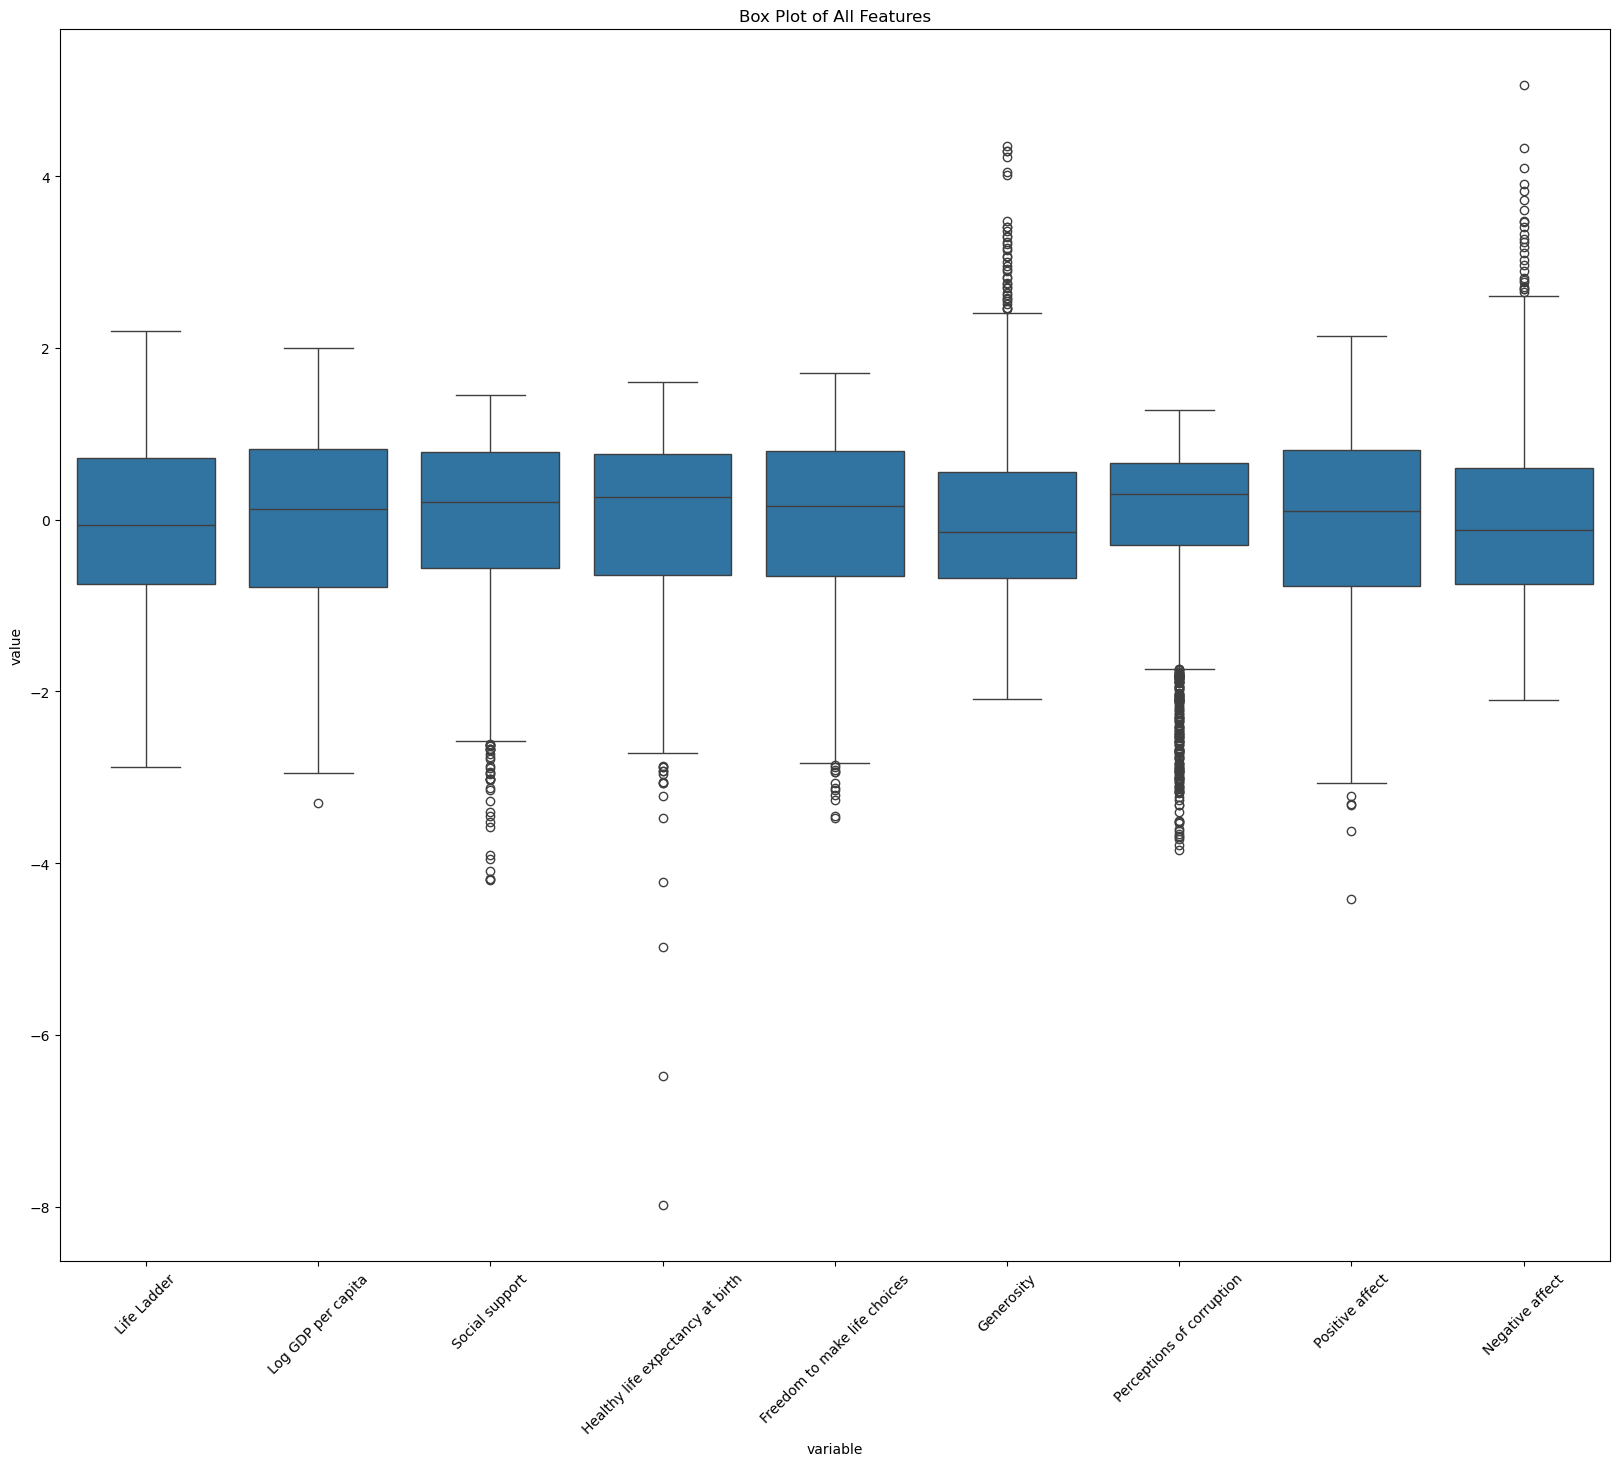

In [15]:
scaler = StandardScaler()

df_standardized = pd.DataFrame(scaler.fit_transform(df.drop(columns=["Country", "Year"])), columns=df.drop(columns=["Country", "Year"]).columns)

df_melted = df_standardized.melt()

# Saving the df_melted for streamlit app
with pd.HDFStore('dataframes.h5') as store:
    store['hap_box_df'] = df_melted

plt.figure(figsize=(20, 16))
sns.boxplot(x='variable', y='value', data=df_melted)

plt.title("Box Plot of All Features")
plt.xticks(rotation=45) 
plt.show()

##### Histograms

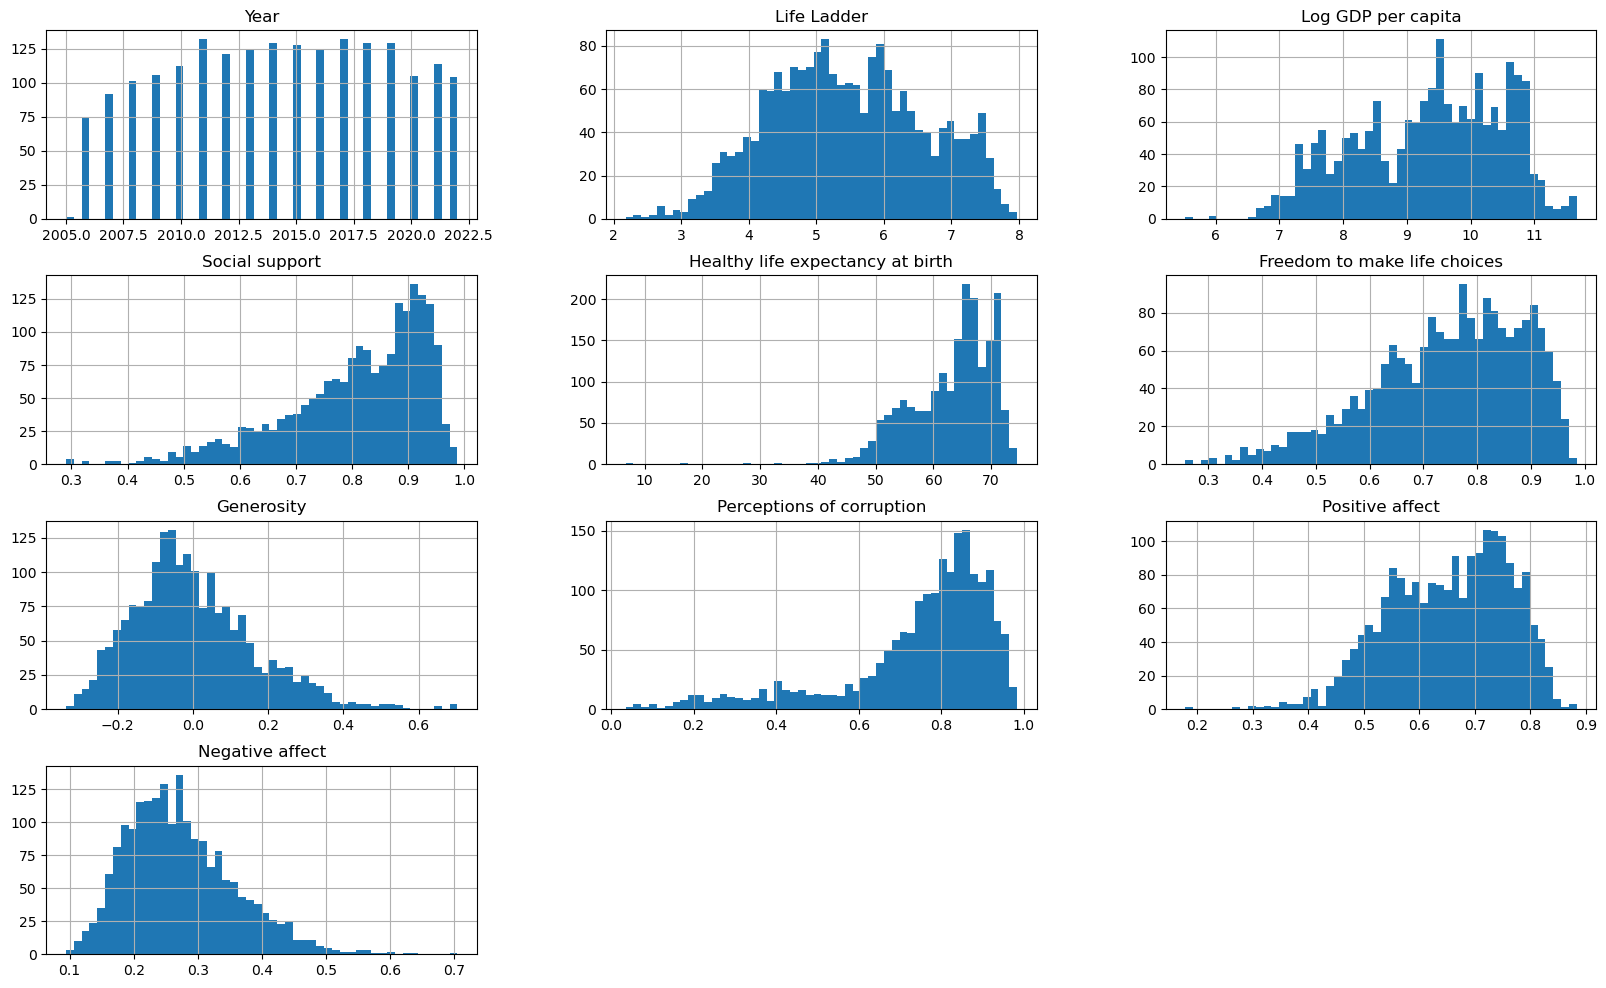

In [17]:
df.drop(columns="Country").hist(bins=50, figsize=(20, 12))

plt.show()

### 1.2) Calculating outliers

Outliers can severaly affect the K-Mean clustering. I'm therefore investigating the outliers of this data to assess whether I should include outliers

In [20]:
dict_of_out_info = calculate_outliers (df, False, True, True, 1.5, "Year")

No outliers calculated for the column arguments
Number of outliers in Life Ladder: 0
Number of outliers in Log GDP per capita: 1
Number of outliers in Social support: 34
Number of outliers in Healthy life expectancy at birth: 15
Number of outliers in Freedom to make life choices: 12
Number of outliers in Generosity: 37
Number of outliers in Perceptions of corruption: 175
Number of outliers in Positive affect: 5
Number of outliers in Negative affect: 25
Total number of rows deleted in returned data frame: 290
Total number of outliers (if there are more outliers than deleted rows it means that some rows contain outliers in more than one column): 304


In [21]:
no_out_df = dict_of_out_info["df_without_outliers"]
no_out_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1668 entries, 1 to 2198
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           1668 non-null   object 
 1   Year                              1668 non-null   int64  
 2   Life Ladder                       1668 non-null   float64
 3   Log GDP per capita                1668 non-null   float64
 4   Social support                    1668 non-null   float64
 5   Healthy life expectancy at birth  1668 non-null   float64
 6   Freedom to make life choices      1668 non-null   float64
 7   Generosity                        1668 non-null   float64
 8   Perceptions of corruption         1668 non-null   float64
 9   Positive affect                   1668 non-null   float64
 10  Negative affect                   1668 non-null   float64
 11  ID                                1668 non-null   int64  
dtypes: float64(

In [22]:
gdp_out_df = dict_of_out_info["Log GDP per capita"]["outliers"]
social_sup_out_df = dict_of_out_info["Social support"]["outliers"]
health_out_df = dict_of_out_info["Healthy life expectancy at birth"]["outliers"]
freedom_out_df = dict_of_out_info["Freedom to make life choices"]["outliers"]
generosity_out_df = dict_of_out_info["Generosity"]["outliers"]
corrupt_out_df = dict_of_out_info["Perceptions of corruption"]["outliers"]
positive_out_df = dict_of_out_info["Positive affect"]["outliers"]
negative_out_df = dict_of_out_info["Negative affect"]["outliers"]


In [23]:
gdp_out_df.iloc[0:30]

,Country,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID
2134,Venezuela,2019,5.080803,5.526723,0.887672,64.400002,0.625526,0.128371,0.83934,0.729553,0.35095,1905


In [24]:
social_sup_out_df.iloc[0:30]


,Country,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,1
5,Afghanistan,2013,3.572100,7.680333,0.483552,52.000000,0.577955,0.062666,0.823204,0.547417,0.273328,6
11,Afghanistan,2019,2.375092,7.640086,0.419973,53.900002,0.393656,-0.106016,0.923849,0.324108,0.502474,12
12,Afghanistan,2021,2.436034,7.324032,0.454175,54.549999,0.394306,-0.081011,0.946299,0.178886,0.606713,13
134,Bangladesh,2008,5.052279,8.046942,0.466553,60.160000,0.606012,-0.057123,0.801820,0.544638,0.231861,122
147,Bangladesh,2021,4.123319,8.684572,0.484740,64.550003,0.893013,0.091825,0.746207,0.503551,0.448261,134
148,Bangladesh,2022,3.407532,8.743257,0.403708,64.675003,0.864576,-0.054776,0.616872,0.393517,0.448060,135
181,Benin,2006,3.329802,7.843533,0.444781,51.959999,0.580069,-0.011397,0.789862,0.520846,0.309100,166
182,Benin,2008,3.667140,7.891244,0.382374,52.480000,0.709477,-0.004467,0.825246,0.573910,0.302546,167
183,Benin,2011,3.870280,7.876235,0.477494,53.259998,0.772919,-0.142097,0.849472,0.574439,0.218678,168


In [25]:
health_out_df.iloc[0:30]


,Country,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID
344,Central African Republic,2007,4.160130,6.945774,0.532297,41.480000,0.662871,0.082950,0.782131,0.566929,0.329995,323
345,Central African Republic,2010,3.567893,7.030766,0.483334,42.500000,0.689951,-0.032762,0.845377,0.477915,0.256705,324
346,Central African Republic,2011,3.677826,7.056533,0.387391,42.840000,0.780018,-0.012097,0.834499,0.501873,0.277180,325
610,Eswatini,2011,4.867091,8.902075,0.837150,42.500000,0.607157,-0.066723,0.917250,0.756366,0.251053,559
766,Haiti,2006,3.754156,7.972617,0.693801,6.720000,0.449475,0.358533,0.853506,0.583196,0.332141,710
767,Haiti,2008,3.846329,8.012043,0.679098,17.360001,0.464971,0.216526,0.811659,0.572523,0.255774,711
768,Haiti,2010,3.765999,7.983535,0.554031,28.000000,0.372941,0.170872,0.848007,0.495069,0.292557,712
769,Haiti,2011,4.844574,8.022003,0.567039,33.320000,0.412588,0.197880,0.681960,0.550258,0.244856,713
770,Haiti,2012,4.413475,8.011640,0.748663,38.639999,0.482486,0.246083,0.717166,0.556583,0.283806,714
1118,Lesotho,2011,4.897515,7.785040,0.824085,41.520000,0.618260,-0.089229,0.767676,0.754062,0.170010,1000


In [26]:

freedom_out_df.iloc[0:30]


,Country,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID
215,Bosnia and Herzegovina,2007,4.899807,9.190633,0.765604,67.000000,0.341566,0.008483,0.926125,0.570178,0.296466,200
216,Bosnia and Herzegovina,2009,4.963477,9.246142,0.735232,67.000000,0.257534,-0.024914,0.958740,0.506856,0.390204,201
218,Bosnia and Herzegovina,2011,4.994671,9.299641,0.725243,67.000000,0.333312,-0.035210,0.924784,0.551055,0.325735,203
288,Burundi,2008,3.563228,6.700229,0.290934,49.660000,0.260069,-0.018414,0.859814,0.415190,0.252771,271
349,Chad,2006,3.434801,7.369200,0.724308,47.080002,0.306132,0.025770,0.961074,0.571168,0.262727,328
350,Chad,2007,4.141327,7.367519,0.478951,47.459999,0.294612,-0.013500,0.873610,0.597517,0.245208,329
774,Haiti,2016,3.352300,8.056166,0.583742,54.900002,0.303540,0.247953,0.838523,0.532205,0.367341,718
884,Iraq,2012,4.659509,9.132593,0.730118,60.860001,0.314565,-0.015048,0.789191,0.410450,0.449059,811
1168,Madagascar,2008,4.640079,7.413261,0.775689,54.619999,0.332436,-0.099016,0.773067,0.582537,0.214525,1047
1488,Pakistan,2008,4.413919,8.309402,0.372908,53.980000,0.335224,0.095418,0.847683,0.532505,0.320658,1354


In [27]:
generosity_out_df.iloc[0:30]


,Country,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID
298,Cambodia,2011,4.161225,7.957363,0.715519,59.340000,0.927462,0.416752,0.775356,0.637013,0.307869,279
668,Gambia,2018,4.922099,7.607178,0.684800,56.700001,0.718729,0.443072,0.691070,0.758668,0.379208,615
669,Gambia,2019,5.163627,7.641713,0.693870,57.000000,0.676595,0.412655,0.798108,0.717893,0.400723,616
852,Indonesia,2010,5.457299,9.013429,0.816022,61.200001,0.699658,0.445357,0.954050,0.716958,0.217908,781
853,Indonesia,2011,5.172608,9.060741,0.824977,61.419998,0.878287,0.435677,0.962295,0.747677,0.273416,782
856,Indonesia,2014,5.597375,9.185947,0.904828,62.080002,0.719413,0.405318,0.970144,0.757047,0.241678,785
857,Indonesia,2015,5.042800,9.222451,0.809478,62.299999,0.779418,0.468550,0.945967,0.796219,0.274292,786
858,Indonesia,2016,5.136325,9.260966,0.791831,62.424999,0.829942,0.496852,0.889677,0.747754,0.341574,787
859,Indonesia,2017,5.098402,9.300357,0.795589,62.549999,0.865026,0.484792,0.900416,0.781278,0.319172,788
860,Indonesia,2018,5.340296,9.341144,0.809379,62.674999,0.879374,0.508754,0.867729,0.796031,0.295987,789


In [28]:
corrupt_out_df.iloc[0:30]


,Country,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID
79,Australia,2010,7.450047,10.713649,0.954520,70.199997,0.932059,0.313121,0.366127,0.761716,0.220073,75
80,Australia,2011,7.405616,10.723386,0.967029,70.279999,0.944586,0.365759,0.381772,0.724132,0.195324,76
81,Australia,2012,7.195586,10.744205,0.944599,70.360001,0.935146,0.270048,0.368252,0.728092,0.214397,77
84,Australia,2015,7.309061,10.769909,0.951862,70.599998,0.921871,0.328289,0.356554,0.749504,0.209637,80
85,Australia,2016,7.250080,10.781229,0.942334,70.675003,0.922316,0.234967,0.398545,0.735896,0.236086,81
86,Australia,2017,7.257038,10.787260,0.949958,70.750000,0.910550,0.313771,0.411347,0.728150,0.225361,82
87,Australia,2018,7.176993,10.800653,0.940137,70.824997,0.916028,0.142901,0.404647,0.705983,0.187456,83
329,Canada,2008,7.485604,10.733166,0.938707,70.680000,0.926315,0.257703,0.369588,0.802224,0.202175,308
330,Canada,2009,7.487824,10.692027,0.942845,70.739998,0.915058,0.242370,0.412622,0.793211,0.247633,309
331,Canada,2010,7.650346,10.711336,0.953765,70.800003,0.933949,0.226587,0.412660,0.791042,0.233113,310


In [29]:
positive_out_df.iloc[0:30]


,Country,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID
12,Afghanistan,2021,2.436034,7.324032,0.454175,54.549999,0.394306,-0.081011,0.946299,0.178886,0.606713,13
1114,Lebanon,2019,4.024220,9.751047,0.865969,66.000000,0.447001,-0.095516,0.890416,0.307577,0.494499,996
1116,Lebanon,2021,2.178809,9.470949,0.506775,66.150002,0.422697,-0.161281,0.905279,0.263487,0.569101,998
1117,Lebanon,2022,2.352428,9.428473,0.534528,66.224998,0.449575,-0.125514,0.882996,0.297508,0.429903,999
1995,Turkiye,2021,4.366640,10.356681,0.736195,68.750000,0.446528,-0.036791,0.810166,0.297092,0.470579,1796


In [30]:
negative_out_df.iloc[0:30]

,Country,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID
11,Afghanistan,2019,2.375092,7.640086,0.419973,53.900002,0.393656,-0.106016,0.923849,0.324108,0.502474,12
12,Afghanistan,2021,2.436034,7.324032,0.454175,54.549999,0.394306,-0.081011,0.946299,0.178886,0.606713,13
75,Armenia,2022,5.381943,9.667766,0.811169,67.925003,0.789599,-0.154325,0.704730,0.530931,0.549468,72
123,Bahrain,2011,4.823976,10.748598,0.907868,65.239998,0.869870,-0.059403,0.582522,0.505992,0.513719,119
348,Central African Republic,2017,3.475862,6.732925,0.319589,45.299999,0.645252,0.077883,0.889566,0.602205,0.599335,327
360,Chad,2017,4.558937,7.365028,0.660616,51.250000,0.614850,0.006798,0.792390,0.584315,0.538245,339
361,Chad,2018,4.486325,7.354710,0.577254,51.625000,0.650355,0.023422,0.762879,0.532490,0.543836,340
363,Chad,2022,4.396646,7.261129,0.719672,53.125000,0.679480,0.221162,0.805424,0.588192,0.499192,342
870,Iran,2013,5.139579,9.554884,0.663707,65.419998,0.730215,0.204346,0.685038,0.574902,0.551840,797
871,Iran,2014,4.682224,9.584558,0.644064,65.559998,0.766823,0.229623,0.639682,0.549892,0.511569,798


#### 1.2.1) Outlier assessment

I find it difficult to assess whether outliers should be included in clustering. All outliers seems valid and they can potentially provide valuable information of the relation between happiness and GDP 

# 2) Preparation of data for clustering

### 2.1) Standardization of data

I'm standardizing the data so that each feature contributes equally to the distance measurements in my K-Mean clustering

In [36]:
# I have already standardized the data when I calculated and showed the box plots of the data

df_standardized.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,-1.521017,-1.722068,-2.895393,-1.790918,-0.194681,1.035838,0.722945,-2.226770,-0.177218
1,-0.926496,-1.585391,-2.072060,-1.748467,-0.473854,1.179097,0.551871,-1.602175,-0.424651
2,-0.613888,-1.494474,-2.179249,-1.706016,-1.034573,0.749173,-0.222502,-1.271983,0.023610
3,-1.426228,-1.522669,-2.324819,-1.663564,-1.776506,1.010591,-0.090930,-1.616940,-0.071938
4,-1.468991,-1.454216,-2.328601,-1.621112,-1.527119,1.468499,0.149654,-0.373059,-0.063209


### 2.2) Checking for multicollinearity 

This is both for the K-Mean clustering and the Linear Regression later. Multicollienarity can bias the clustering and regression model if two or more features are indicating the same underlying information, which is likely in this case given that all the features are trying to capture the happiness of a country  

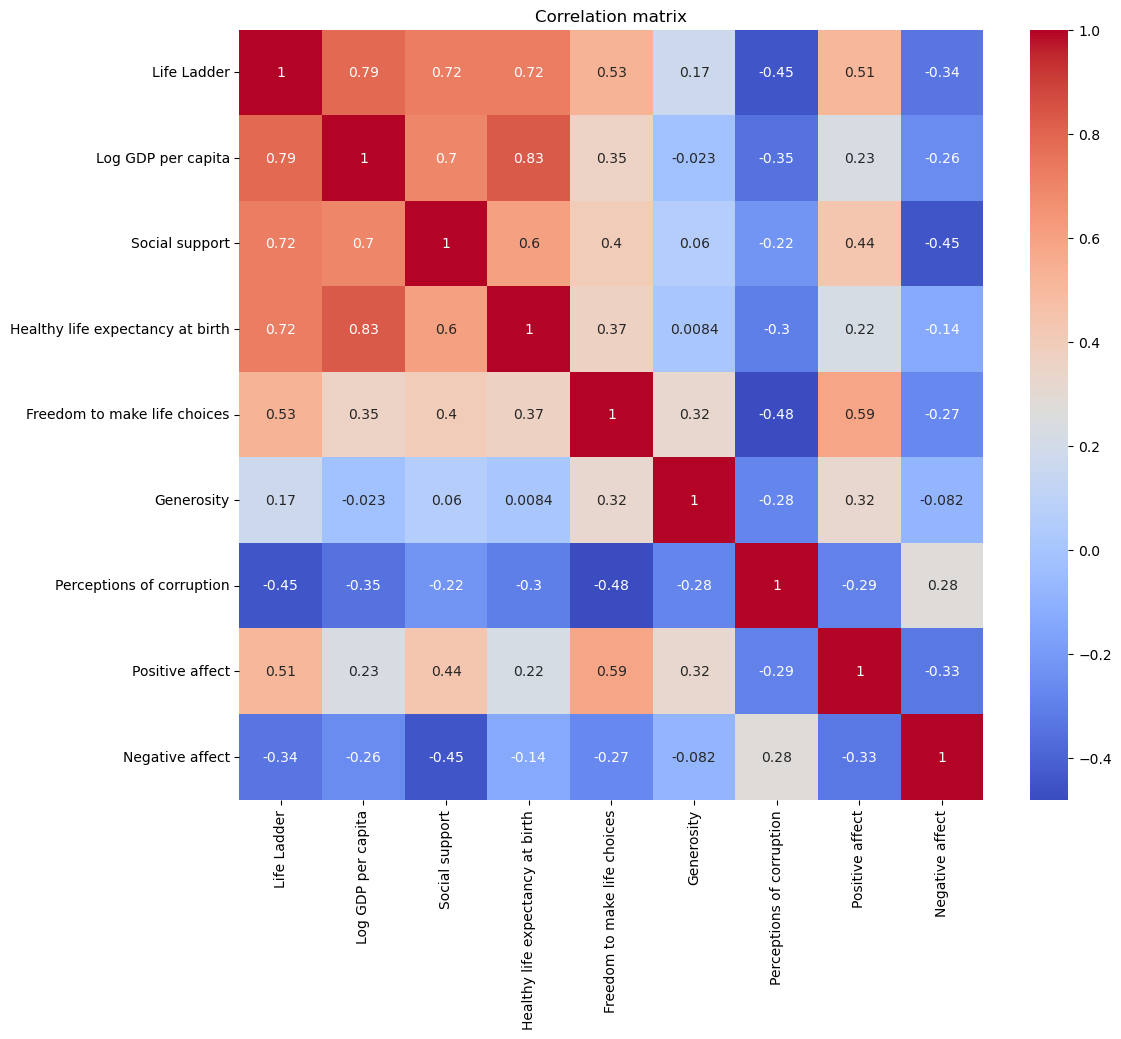

In [39]:
correlation_matrix = df_standardized.corr()

# Saving the df_melted for streamlit app
with pd.HDFStore('dataframes.h5') as store:
    store['hap_cor_df'] = df_melted


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

#### 2.2.1) Removing columns to avoid multicollinearity

In [41]:
df_standardized.drop(columns= ["Social support", "Healthy life expectancy at birth"], inplace=True)

# 3) K-Mean clustering of data

### 3.1) Estimating the best fitting number of clusters

In [44]:
features_for_clustering = df_standardized[["Freedom to make life choices","Generosity", "Perceptions of corruption", "Positive affect", "Negative affect"]]

##### Inertia

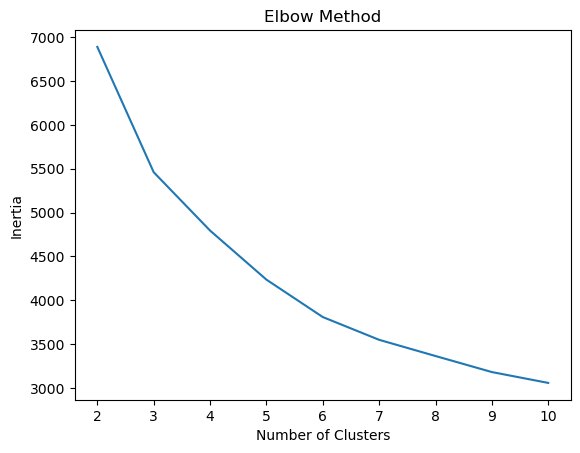

In [46]:
inertia = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_for_clustering)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

##### Distortions

In [48]:
distortions = []

K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k, n_init=10).fit(features_for_clustering)
    model.fit(features_for_clustering)
    distortions.append(sum(np.min(cdist(features_for_clustering, model.cluster_centers_, 'euclidean'), axis=1)) / features_for_clustering.shape[0]) 


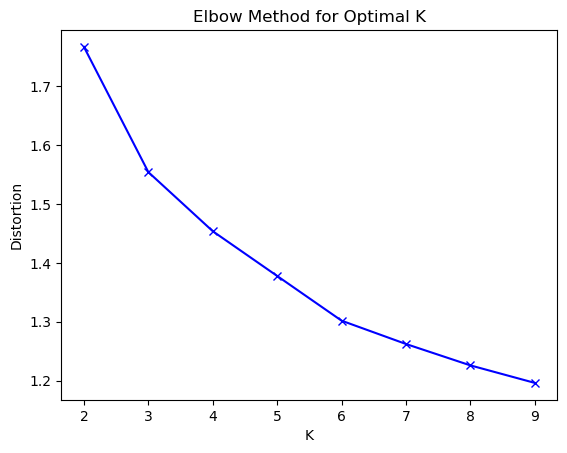

In [49]:
plt.title('Elbow Method for Optimal K')
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

##### Silhoutte score

In [51]:
scores = []
K = range(2,10)
for k in K:
    model1 = KMeans(n_clusters=k, n_init=10)
    model1.fit(features_for_clustering)
    score1 = metrics.silhouette_score(features_for_clustering, model1.labels_, metric='euclidean', sample_size=len(features_for_clustering))
    print("\nNumber of clusters =", k)
    print("Silhouette score =", score1)
    scores.append(score1)


Number of clusters = 2
Silhouette score = 0.2572673236064912

Number of clusters = 3
Silhouette score = 0.2532289169958543

Number of clusters = 4
Silhouette score = 0.23485347129230444

Number of clusters = 5
Silhouette score = 0.23639336256361088

Number of clusters = 6
Silhouette score = 0.22470519726693333

Number of clusters = 7
Silhouette score = 0.21902005406753464

Number of clusters = 8
Silhouette score = 0.21609951774925357

Number of clusters = 9
Silhouette score = 0.21101732714180388


### 3.2) Training the K-Means model and assigning each row to a cluster

#### 3.2.1) Training and assigning

In [54]:
num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42)

df_standardized['Cluster'] = kmeans.fit_predict(features_for_clustering)

df_standardized['Country'] = df['Country'].values
df_standardized['Year'] = df['Year'].values

df_standardized = df_standardized[['Country', 'Year'] + list(df_standardized.columns[:-2])]

df_standardized.head()

,Country,Year,Life Ladder,Log GDP per capita,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Cluster
0,Afghanistan,2008,-1.521017,-1.722068,-0.194681,1.035838,0.722945,-2.226770,-0.177218,1
1,Afghanistan,2009,-0.926496,-1.585391,-0.473854,1.179097,0.551871,-1.602175,-0.424651,1
2,Afghanistan,2010,-0.613888,-1.494474,-1.034573,0.749173,-0.222502,-1.271983,0.023610,1
3,Afghanistan,2011,-1.426228,-1.522669,-1.776506,1.010591,-0.090930,-1.616940,-0.071938,1
4,Afghanistan,2012,-1.468991,-1.454216,-1.527119,1.468499,0.149654,-0.373059,-0.063209,1


In [55]:
cluster1_df = df_standardized[df_standardized["Cluster"]==0]
cluster2_df = df_standardized[df_standardized["Cluster"]==1]
cluster3_df = df_standardized[df_standardized["Cluster"]==2]

#### 3.2.2) Exploration of the clusters

In [57]:
cluster1_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 966 entries, 23 to 1957
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       966 non-null    object 
 1   Year                          966 non-null    int64  
 2   Life Ladder                   966 non-null    float64
 3   Log GDP per capita            966 non-null    float64
 4   Freedom to make life choices  966 non-null    float64
 5   Generosity                    966 non-null    float64
 6   Perceptions of corruption     966 non-null    float64
 7   Positive affect               966 non-null    float64
 8   Negative affect               966 non-null    float64
 9   Cluster                       966 non-null    int32  
dtypes: float64(7), int32(1), int64(1), object(1)
memory usage: 79.2+ KB


In [58]:
countries1 = cluster1_df["Country"].nunique()
print(countries1)

113


In [59]:
countries1_vc = cluster1_df["Country"].value_counts()
print(countries1_vc)

Country
Kazakhstan      17
Chile           17
Argentina       17
Senegal         17
Nicaragua       17
                ..
Saudi Arabia     1
Suriname         1
Sudan            1
Guyana           1
Nepal            1
Name: count, Length: 113, dtype: int64


In [60]:
cluster2_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 680 entries, 0 to 1956
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       680 non-null    object 
 1   Year                          680 non-null    int64  
 2   Life Ladder                   680 non-null    float64
 3   Log GDP per capita            680 non-null    float64
 4   Freedom to make life choices  680 non-null    float64
 5   Generosity                    680 non-null    float64
 6   Perceptions of corruption     680 non-null    float64
 7   Positive affect               680 non-null    float64
 8   Negative affect               680 non-null    float64
 9   Cluster                       680 non-null    int32  
dtypes: float64(7), int32(1), int64(1), object(1)
memory usage: 55.8+ KB


In [61]:
countries2 = cluster2_df["Country"].nunique()
print(countries2)

84


In [62]:
countries2_vc = cluster2_df["Country"].value_counts()

print(countries2_vc)

Country
Georgia         17
Armenia         16
Lebanon         16
Turkiye         15
Ukraine         15
                ..
Spain            1
Ghana            1
Saudi Arabia     1
Bahrain          1
Gambia           1
Name: count, Length: 84, dtype: int64


In [63]:
cluster3_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 312 entries, 72 to 1891
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       312 non-null    object 
 1   Year                          312 non-null    int64  
 2   Life Ladder                   312 non-null    float64
 3   Log GDP per capita            312 non-null    float64
 4   Freedom to make life choices  312 non-null    float64
 5   Generosity                    312 non-null    float64
 6   Perceptions of corruption     312 non-null    float64
 7   Positive affect               312 non-null    float64
 8   Negative affect               312 non-null    float64
 9   Cluster                       312 non-null    int32  
dtypes: float64(7), int32(1), int64(1), object(1)
memory usage: 25.6+ KB


In [64]:
countries3 = cluster3_df["Country"].nunique()
print(countries3)

40


In [65]:
countries3_vc = cluster3_df["Country"].value_counts()
print(countries3_vc)

Country
Ireland                 16
United Kingdom          16
Sweden                  16
Canada                  16
Denmark                 16
New Zealand             16
Australia               15
Finland                 15
Netherlands             15
Austria                 14
Singapore               13
Switzerland             12
Norway                  12
Luxembourg              12
Rwanda                  11
Uzbekistan              11
Myanmar                 10
Germany                 10
Iceland                  9
Belgium                  7
Malta                    5
Tanzania                 5
Laos                     4
Thailand                 4
Indonesia                4
United Arab Emirates     3
United States            3
Estonia                  3
Somalia                  3
Niger                    2
Gambia                   2
Sri Lanka                2
Malawi                   2
Bhutan                   2
Uruguay                  1
Kuwait                   1
Cambodia            

##### 3.2.2.1) Checking if the same country appears in two different columns

In [67]:
df1_countries = set(cluster1_df['Country'].unique())
df2_countries = set(cluster2_df['Country'].unique())
df3_countries = set(cluster3_df['Country'].unique())

if df1_countries.isdisjoint(df2_countries) and df1_countries.isdisjoint(df3_countries) and df2_countries.isdisjoint(df3_countries):
    print("All the values in the 'Country' column are different across the DataFrames.")
else:
    print("There are common values in the 'Country' column between the DataFrames.")

There are common values in the 'Country' column between the DataFrames.


### 3.3) Deleting rows before Linear Regression models

I'm deleting all the countries from the 3 cluster data frames which appear less than 6 times in the given cluster data frame. This is because I want to have the countries separated so a country only appear in 1 cluster and so that the cluster the country appears in is the cluster with the most appearences of the country.   

In [70]:
filtered_countries1_vc = countries1_vc[countries1_vc < 9]
filtered_countries2_vc = countries2_vc[countries2_vc < 9]
filtered_countries3_vc = countries3_vc[countries3_vc < 9]

In [71]:
filtered_countries1_vc.info()

<class 'pandas.core.series.Series'>
Index: 57 entries, Romania to Nepal
Series name: count
Non-Null Count  Dtype
--------------  -----
57 non-null     int64
dtypes: int64(1)
memory usage: 912.0+ bytes


In [72]:
filtered_countries2_vc.info()

<class 'pandas.core.series.Series'>
Index: 43 entries, Russia to Gambia
Series name: count
Non-Null Count  Dtype
--------------  -----
43 non-null     int64
dtypes: int64(1)
memory usage: 688.0+ bytes


In [73]:
filtered_countries3_vc.info()

<class 'pandas.core.series.Series'>
Index: 21 entries, Belgium to Djibouti
Series name: count
Non-Null Count  Dtype
--------------  -----
21 non-null     int64
dtypes: int64(1)
memory usage: 336.0+ bytes


In [74]:
countries_to_remove1 = filtered_countries1_vc.index
countries_to_remove2 = filtered_countries2_vc.index
countries_to_remove3 = filtered_countries3_vc.index

filtered_df1 = cluster1_df[~cluster1_df['Country'].isin(countries_to_remove1)]
filtered_df2 = cluster2_df[~cluster2_df['Country'].isin(countries_to_remove2)]
filtered_df3 = cluster3_df[~cluster3_df['Country'].isin(countries_to_remove3)]

In [75]:
filtered_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 779 entries, 39 to 1957
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       779 non-null    object 
 1   Year                          779 non-null    int64  
 2   Life Ladder                   779 non-null    float64
 3   Log GDP per capita            779 non-null    float64
 4   Freedom to make life choices  779 non-null    float64
 5   Generosity                    779 non-null    float64
 6   Perceptions of corruption     779 non-null    float64
 7   Positive affect               779 non-null    float64
 8   Negative affect               779 non-null    float64
 9   Cluster                       779 non-null    int32  
dtypes: float64(7), int32(1), int64(1), object(1)
memory usage: 63.9+ KB


In [76]:
filtered_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515 entries, 0 to 1925
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       515 non-null    object 
 1   Year                          515 non-null    int64  
 2   Life Ladder                   515 non-null    float64
 3   Log GDP per capita            515 non-null    float64
 4   Freedom to make life choices  515 non-null    float64
 5   Generosity                    515 non-null    float64
 6   Perceptions of corruption     515 non-null    float64
 7   Positive affect               515 non-null    float64
 8   Negative affect               515 non-null    float64
 9   Cluster                       515 non-null    int32  
dtypes: float64(7), int32(1), int64(1), object(1)
memory usage: 42.2+ KB


In [77]:
filtered_df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255 entries, 72 to 1891
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       255 non-null    object 
 1   Year                          255 non-null    int64  
 2   Life Ladder                   255 non-null    float64
 3   Log GDP per capita            255 non-null    float64
 4   Freedom to make life choices  255 non-null    float64
 5   Generosity                    255 non-null    float64
 6   Perceptions of corruption     255 non-null    float64
 7   Positive affect               255 non-null    float64
 8   Negative affect               255 non-null    float64
 9   Cluster                       255 non-null    int32  
dtypes: float64(7), int32(1), int64(1), object(1)
memory usage: 20.9+ KB


#### 3.3.1) Checking that every country only appear in 1 filtered cluster df

In [79]:
df1_countries2 = set(filtered_df1['Country'].unique())
df2_countries2 = set(filtered_df2['Country'].unique())
df3_countries2 = set(filtered_df3['Country'].unique())

if df1_countries2.isdisjoint(df2_countries2) and df1_countries2.isdisjoint(df3_countries2) and df2_countries2.isdisjoint(df3_countries2):
    print("All the values in the 'Country' column are different across the DataFrames.")
else:
    print("There are common values in the 'Country' column between the DataFrames.")


All the values in the 'Country' column are different across the DataFrames.


### 3.4) Validating the model with silhoutte score (proforma: Already checked it earlier when choosing number of clusters)

In [81]:
score2 = metrics.silhouette_score(features_for_clustering, kmeans.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score2)

Silhouette Score: 0.253


# 4) Multiple Linear Regression models for predicting GDP

### 4.1) Training and testing models

##### X features

In [85]:
X = ["Life Ladder","Freedom to make life choices", "Generosity","Perceptions of corruption", "Positive affect", "Negative affect"]

##### Original data (not clustered)

In [87]:
linear_model_org = train_and_test_linear_model(df_standardized, "Log GDP per capita", X, .2, False)

               Metric  Value
0                 MAE  0.431
1                 MSE  0.305
2                RMSE  0.552
3  Explained Variance  0.651
4           R-Squared  0.651


##### Cluster 1

In [89]:
linear_clust1 = train_and_test_linear_model(filtered_df1, "Log GDP per capita", X, .2, False)

               Metric  Value
0                 MAE  0.427
1                 MSE  0.309
2                RMSE  0.556
3  Explained Variance  0.583
4           R-Squared  0.578


##### Cluster 2

In [91]:
linear_clust2 = train_and_test_linear_model(filtered_df2, "Log GDP per capita", X, .2, False)

               Metric  Value
0                 MAE  0.439
1                 MSE  0.290
2                RMSE  0.538
3  Explained Variance  0.627
4           R-Squared  0.620


##### Cluster 3

In [93]:
linear_clust3 = train_and_test_linear_model(filtered_df3, "Log GDP per capita", X, .2, False)

               Metric  Value
0                 MAE  0.285
1                 MSE  0.209
2                RMSE  0.457
3  Explained Variance  0.808
4           R-Squared  0.808


### 4.2) Evaluating models

2 of the 3 clusters (cluster 1 and 2) are not that great at predicting the GDP from the happiness features (they both have an R-Squared under 0.65). On the other hand cluster 3 does predict GDP from happiness features quite well with an R-Squared of 0.808.



### 4.3) Pie charts of the distribution of continents in the clusters 

In [96]:
filtered_df1['Continent'] = filtered_df1['Country'].apply(get_continent)
filtered_df2['Continent'] = filtered_df2['Country'].apply(get_continent)
filtered_df3['Continent'] = filtered_df3['Country'].apply(get_continent)

with pd.HDFStore('dataframes.h5') as store:
    store['clust1_df'] = filtered_df1

with pd.HDFStore('dataframes.h5') as store:
    store['clust2_df'] = filtered_df2

with pd.HDFStore('dataframes.h5') as store:
    store['clust3_df'] = filtered_df3

C:\Users\acm11\AppData\Local\Temp\ipykernel_9776\424220485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1['Continent'] = filtered_df1['Country'].apply(get_continent)
C:\Users\acm11\AppData\Local\Temp\ipykernel_9776\424220485.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['Continent'] = filtered_df2['Country'].apply(get_continent)
C:\Users\acm11\AppData\Local\Temp\ipykernel_9776\424220485.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

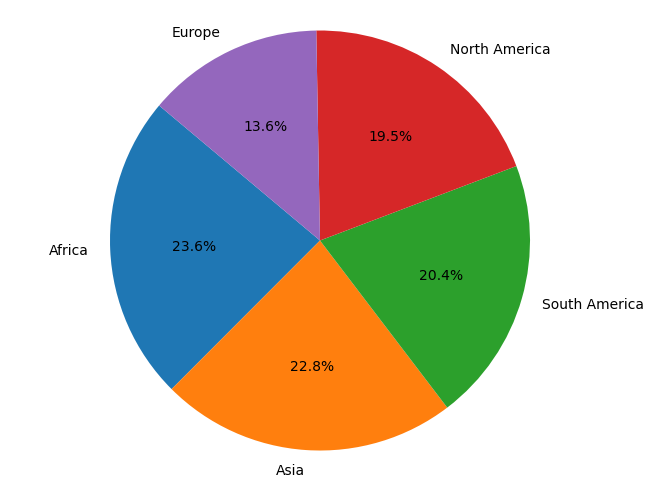

In [97]:
value_counts1 = filtered_df1['Continent'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(value_counts1, labels=value_counts1.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal') 
plt.show()

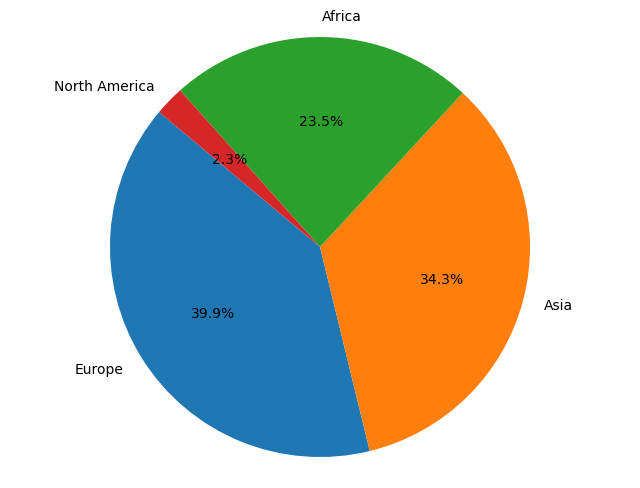

In [98]:
value_counts2 = filtered_df2['Continent'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(value_counts2, labels=value_counts2.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal') 
plt.show()

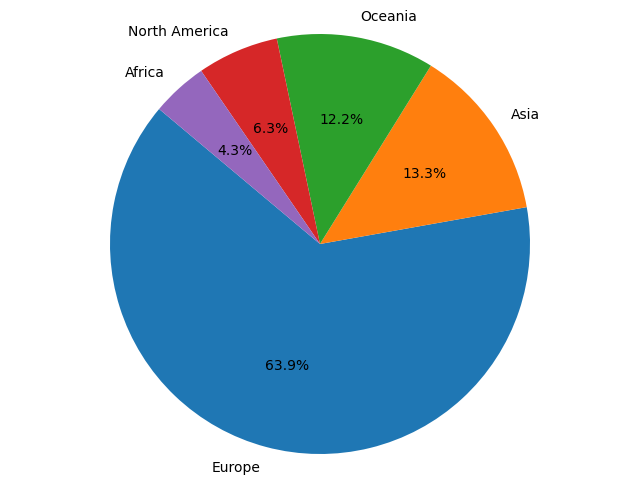

In [99]:
value_counts3 = filtered_df3['Continent'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(value_counts3, labels=value_counts3.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal') 
plt.show()

### 4.4) Linear model only with European countries (because of the pie charts)

In [101]:
df_standardized["Continent"] = df_standardized['Country'].apply(get_continent)

In [102]:
df_europe = df_standardized[df_standardized["Continent"]== "Europe"]
df_europe.head()

,Country,Year,Life Ladder,Log GDP per capita,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Cluster,Continent
13,Albania,2007,-0.722703,-0.192051,-1.543707,-0.065877,0.685181,-1.533344,-0.316282,1,Europe
14,Albania,2009,0.023501,-0.088634,-1.567778,-0.986631,0.625541,-0.829363,0.069721,1,Europe
15,Albania,2010,-0.166319,-0.052905,-1.256449,-1.075820,-0.117128,-0.721405,0.313644,1,Europe
16,Albania,2011,0.358331,-0.028869,-1.836338,-1.276951,0.697629,-0.817411,-0.196201,1,Europe
17,Albania,2012,0.045113,-0.015286,-1.024715,-1.055974,0.539114,-0.931730,-0.022475,1,Europe


In [103]:
linear_model_europe = train_and_test_linear_model(df_europe, "Log GDP per capita", X, .2, False)

               Metric  Value
0                 MAE  0.199
1                 MSE  0.067
2                RMSE  0.260
3  Explained Variance  0.694
4           R-Squared  0.693


# 5) Polynomial regression models

In [105]:
poly_model_org = train_and_test_linear_model(df, "Log GDP per capita", X, .2, True, 2)


               Metric  Value
0                 MAE  0.452
1                 MSE  0.318
2                RMSE  0.564
3  Explained Variance  0.728
4           R-Squared  0.728


In [106]:
poly_clust1 = train_and_test_linear_model(filtered_df1, "Log GDP per capita", X, .2, True, 2)


               Metric  Value
0                 MAE  0.370
1                 MSE  0.230
2                RMSE  0.479
3  Explained Variance  0.688
4           R-Squared  0.686


In [107]:
poly_clust2 = train_and_test_linear_model(filtered_df2, "Log GDP per capita", X, .2, True,3)


               Metric  Value
0                 MAE  0.441
1                 MSE  0.315
2                RMSE  0.562
3  Explained Variance  0.588
4           R-Squared  0.587


In [108]:
poly_clust3 = train_and_test_linear_model(filtered_df3, "Log GDP per capita", X, .2, True, 2, )

               Metric  Value
0                 MAE  0.300
1                 MSE  0.247
2                RMSE  0.496
3  Explained Variance  0.780
4           R-Squared  0.774


In [109]:
filtered_df3["Country"].value_counts()

Country
Canada            16
Denmark           16
United Kingdom    16
Ireland           16
New Zealand       16
Sweden            16
Australia         15
Finland           15
Netherlands       15
Austria           14
Singapore         13
Switzerland       12
Luxembourg        12
Norway            12
Uzbekistan        11
Rwanda            11
Germany           10
Myanmar           10
Iceland            9
Name: count, dtype: int64

# 6) Saving the best fitted model (of the original data)

In [111]:
with open('poly_model.pkl', 'wb') as file:
    pickle.dump(poly_model_org, file)